# Anotacoes do estudo de machine learning

Esse documento irá explicar e modelos de ML:

- Previsão Categórica - Modelo KNN(K Nearest Neighbors)
- Previsão Quantitativa - Regressão Linear
- Reconhecimento de Imagens - SVM: Support Vector Machine

### Previsão Categórica - Modelo KNN(K Nearest Neighbors)

De inicio, deve ser separado duas variaveis, uma para armazenar o os dados de observação e outra que seria o seu target, devem possuir o mesmo tamanho usar o .shape.

De inicio ele pega um arquivo iris do próprio Scikit-learn

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

x = iris.data #Observacao
y = iris.target #Target

In [2]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
from sklearn.neighbors import KNeighborsClassifier #Importar o KNN
knn = KNeighborsClassifier(n_neighbors=1) #Considera o K igual a 1

knn.fit(x,y) #Treinar a maquina

species = knn.predict([[5.9,3,5.1,1.8]])[0] #Fazer previsao
print(iris.target_names[species])

virginica


##### Avaliacao de performance do modelo

In [4]:
from sklearn.model_selection import train_test_split #Separar em dois grupos
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25) #Separa 75% para estudo

In [5]:
knn.fit(x_train,y_train) #realiza o treino
previsoes = knn.predict(x_test)

from sklearn import metrics #importa o metrics para avaliar a performance 
acertos = metrics.accuracy_score(y_test,previsoes)
print(acertos)

1.0


### Previsão Quantitativa - Regressão Linear

Para apresentar este metodo, foi utilizado dados de um arquivo externo de investimentos de publicidade, mostrando os investimento de TV, Radio e Jornal o quanto obtece de retorno.

In [6]:
import pandas as pd #imporacao do arquivo

publi = pd.read_csv('advertising.csv')

x_rl = publi[["TV","Radio","Newspaper"]]
y_rl = publi["Sales"]

C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


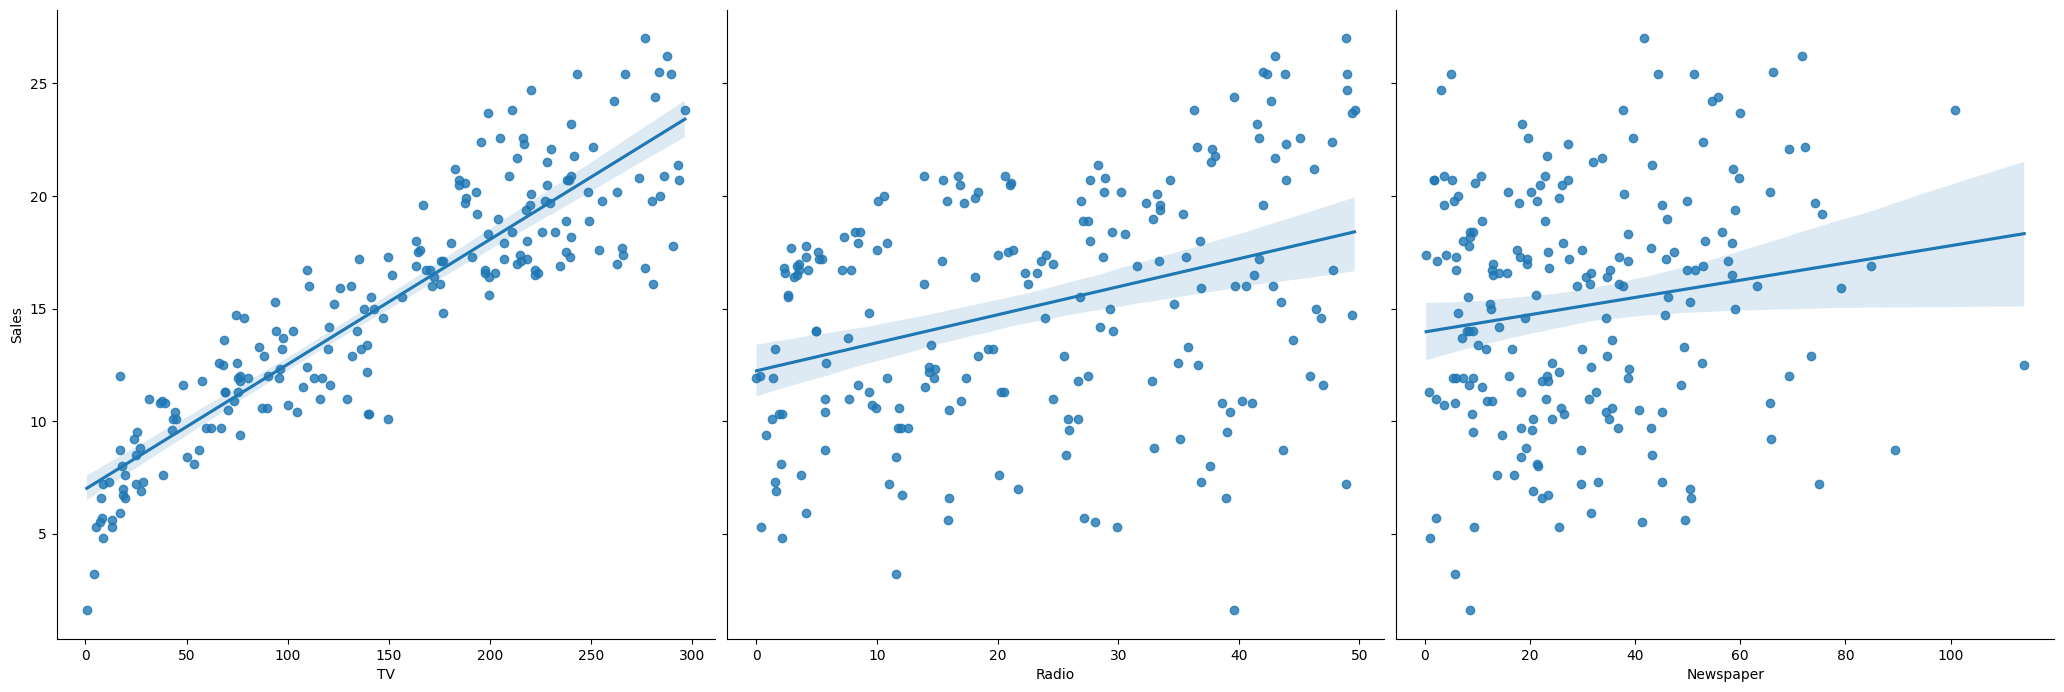

In [7]:
import seaborn as sns #Apresentacao dos dados de forma grafica
sns.pairplot(publi,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=7,kind='reg')

In [8]:
from sklearn.model_selection import train_test_split #Separar em dois grupos
x_train, x_test, y_train, y_test = train_test_split(x_rl,y_rl,test_size=0.3) #Separa 70% para estudo

In [9]:
from sklearn.linear_model import LinearRegression #Importando o modelo de regressao linear
reglin = LinearRegression()
reglin.fit(x_train,y_train)

LinearRegression()

In [10]:
list(zip(["TV","Radio","Newspaper"],reglin.coef_)) #O coeficiente das vendas

[('TV', 0.052841897576244384),
 ('Radio', 0.10210470778564727),
 ('Newspaper', -0.004138664686551566)]

In [11]:
#Realizando uma previsão, passando um dado de investimento
print(reglin.predict([[230.1,37.8,69.2]]))

[20.75310186]


C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### Avaliacao de performance do modelo

Para o modelo de regressao linear, o teste de performance ocorrer de forma diferente do KNN, sera avaliado o erro do modelo, para medir este erro existem alguns métodos:

###### MAE (Mean Absolute Error) - media dos erros

In [12]:
y_prev = reglin.predict(x_test)

from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_prev))

1.5089831549928683


###### MSE (Mean Squared Error) - media quadratica

In [13]:
print(metrics.mean_squared_error(y_test,y_prev))

3.833912181311504


###### RMSE (Root Mean Squared Error)

In [14]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.9580378396015496


### Reconhecimento de Imagens - SVM: Support Vector Machine

Sera estudado a biblioteca digits do sklearn

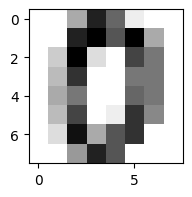

In [15]:
from sklearn import datasets #importacao do dataset
digits = datasets.load_digits()

import matplotlib.pyplot as plt #importacao do matplotlib para visualizar o dado
%matplotlib inline

plt.figure(figsize=(2,2))
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

In [16]:
from sklearn.model_selection import train_test_split
x_svm = digits.data
y_svm = digits.target

x_train, x_test, y_train, y_test = train_test_split(x_svm,y_svm,test_size=0.20,random_state=5)

In [17]:
#Avaliacao de performance do modelo

from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
classifier.fit(x_train,y_train)
previsoes = classifier.predict(x_test)
acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9777777777777777


###### Aplicando para uma imagem de um digito

In [18]:
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('number.png')

#Transformar a imagem externa em um formato para o maquina conseguir avaliar com o modelo
def rgb2gray(rgb):
    img_array = np.dot(rgb[...,:3], [0.299,0.587,0.114])
    img_array = (16 - (img_array * 16)).astype(int)
    img_array = img_array.flatten()
    return img_array
    
from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
classifier.fit(x_svm,y_svm)
previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[1]


###### Teste com regressao logistica

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_svm,y_svm)
previsao_logreg = logreg.predict([rgb2gray(img)])
print(previsao_logreg)

[1]


C:\Users\alexr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
